In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

####IMPORT STATEMENTS

In [1]:
import io
import locale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

####Look-up for City Names

In [2]:
jurisdiction_codes = {
    1: 'Carlsbad',2: 'Chula Vista',3: 'Coronado',4: 'Del Mar',5: 'El Cajon',6: 'Encinitas',7: 'Escondido',
    8: 'Imperial Beach',9: 'La Mesa',10: 'Lemon Grove',11: 'National City',12: 'Oceanside',13: 'Poway',
    14: 'San Diego',15: 'San Marcos',16: 'Santee',17: 'Solana Beach',18: 'Vista',19: 'Unincorporated'
}

jurisdictions = pd.Series(jurisdiction_codes, name='jurisdiction')

mode_codes = {
    'Auto SOV (Non-Toll)': (1, 1),'Auto SOV (Toll)': (2, 1),
    'Auto 2 Person (Non-Toll, Non-HOV)': (3, 2),'Auto 2 Person (Non-Toll, HOV)': (4, 2),'Auto 2 Person (Toll, HOV)': (5, 2),
    'Auto 3+ Person (Non-Toll, Non-HOV)': (6, 3),'Auto 3+ Person (Non-Toll, HOV)': (7, 3),'Auto 3+ Person (Toll, HOV)': (8, 3),
    'Walk': (9, 4),'Bike': (10, 5),
    'Walk-Local Bus': (11, 6),'Walk-Express Bus': (12, 6),'Walk-Light Rail': (14, 6),'Walk-Heavy Rail': (15, 6),
    'PNR-Local Bus': (16, 6),'PNR-Express Bus': (17, 6),'PNR-Light Rail': (19, 6),'PNR-Heavy Rail': (20, 6),
    'KNR-Local Bus': (21, 6),'KNR-Express Bus': (22, 6),'KNR-Light Rail': (24, 6),'KNR-Heavy Rail': (25, 6)
}



modes = pd.DataFrame({'mode_id': [1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,19,20,21,22,24,25]
                      ,'super_mode' : ['Drive Alone','Drive Alone','HOV','HOV','HOV','HOV','HOV','HOV','Walk','Bike','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit','Transit']}
                    ,index = ['Auto SOV (Non-Toll)','Auto SOV (Toll)'
                             ,'Auto 2 Person (Non-Toll, Non-HOV)','Auto 2 Person (Non-Toll, HOV)','Auto 2 Person (Toll, HOV)'
                             ,'Auto 3+ Person (Non-Toll, Non-HOV)','Auto 3+ Person (Non-Toll, HOV)','Auto 3+ Person (Toll, HOV)'
                             ,'Walk','Bike'
                             ,'Walk-Local Bus','Walk-Express Bus','Walk-Light Rail','Walk-Heavy Rail'
                             ,'PNR-Local Bus','PNR-Express Bus','PNR-Light Rail','PNR-Heavy Rail'
                             ,'KNR-Local Bus','KNR-Express Bus','KNR-Light Rail','KNR-Heavy Rail'
                            ])

####Load up the datasets

In [10]:
locale.setlocale(locale.LC_ALL, '')

base_csv_url = 'E:/Apps/sandag.github.io/transnet/baseline_mandatory_residents.csv'
alt_csv_url = 'E:/Apps/sandag.github.io/transnet/no_sr52_mandatory_residents.csv'

base_df = pd.read_csv(base_csv_url, index_col='tour_ij_id')
alt_df = pd.read_csv(alt_csv_url, index_col='tour_ij_id')

base_df = pd.merge(base_df, modes, left_on='mode_desc', right_index=True)
alt_df = pd.merge(alt_df, modes, left_on='mode_desc', right_index=True)

####Casual Tour Statistics

In [11]:
print 'Total Number of Mandatory Tours (Base Case): {0:>10,}'.format(len(base_df))
print 'Total Number of Mandatory Tours (Alt Case): {0:>11,}'.format(len(alt_df))

Total Number of Mandatory Tours (Base Case):  1,107,866
Total Number of Mandatory Tours (Alt Case):   1,107,849


####Total Daily Time Change for Workers

In [12]:
daily_min_change = alt_df.tour_time.sum() - base_df.tour_time.sum()

print 'Total Daily Change in Time Spent on Mandatory Tours: {0:>12,.1f} minutes'.format(daily_min_change)
print 'Total Daily Change in Time Spent on Mandatory Tours: {0:>12,.1f} hours'.format(daily_min_change / 60.)

Total Daily Change in Time Spent on Mandatory Tours:    348,417.3 minutes
Total Daily Change in Time Spent on Mandatory Tours:      5,807.0 hours


####Total Annual Time Change for Workers

In [13]:
base_df.loc[:, 'annual_tour_time'] = base_df.tour_time * base_df.weeks_worked * base_df.avg_days_worked
alt_df.loc[:, 'annual_tour_time'] = alt_df.tour_time * alt_df.weeks_worked * alt_df.avg_days_worked

annual_min_change = alt_df.annual_tour_time.sum() - base_df.annual_tour_time.sum()

print 'Total Annual Change in Time Spent on Mandatory Tours: {0:>15,.0f} minutes'.format(annual_min_change)
print 'Total Annual Change in Time Spent on Mandatory Tours: {0:>15,.0f} hours'.format(annual_min_change / 60.)

Total Annual Change in Time Spent on Mandatory Tours:      84,092,066 minutes
Total Annual Change in Time Spent on Mandatory Tours:       1,401,534 hours


####Total Annual Monetary Savings for Workers
Value of time is derived from person table: hh_income / num_workers / annual_hours_worked

In [14]:
base_df.loc[:, 'annual_commute_cost'] = base_df.derived_hourly_salary * (base_df.annual_tour_time / 60)
alt_df.loc[:, 'annual_commute_cost'] = alt_df.derived_hourly_salary * (alt_df.annual_tour_time / 60)

annual_cost_difference = alt_df.annual_commute_cost.sum() - base_df.annual_commute_cost.sum()

print 'Total Annual Change in User Costs without the Project: {0}'.format(locale.currency(annual_cost_difference, grouping=True))
print 'Average Annual Commuter Savings without the Project: {0}'.format(locale.currency(annual_cost_difference / len(base_df)), grouping=True)

Total Annual Change in User Costs without the Project: $40,358,683.17
Average Annual Commuter Savings without the Project: $36.43


####Total and Average Annual Savings for Commuters by Jurisdiction
Value of time is derived from person table: hh_income / num_workers / annual_hours_worked

In [15]:
base_jurisdiction = base_df[['home_jurisdiction','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('home_jurisdiction').sum()
alt_jurisdiction = alt_df[['home_jurisdiction','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('home_jurisdiction').sum()
base_commuters = base_df[['home_jurisdiction','annual_commute_cost']].groupby('home_jurisdiction').count()
base_commuters.columns = ['commuters']

jurisdiction_diff = alt_jurisdiction - base_jurisdiction
jurisdiction_diff = jurisdiction_diff.join(jurisdictions)
print jurisdiction_diff[['jurisdiction','annual_commute_cost']].to_string(formatters={'annual_commute_cost': '${:,.2f}'.format})

commuter_savings = jurisdiction_diff['annual_commute_cost'] / base_commuters['commuters']
print pd.concat([jurisdictions, commuter_savings], axis=1, keys=['jurisdiction','avg_annual_commute_savings']).to_string(formatters={'avg_annual_commute_savings': '${:,.2f}'.format})

                     jurisdiction annual_commute_cost
home_jurisdiction                                    
1                        Carlsbad      $-1,846,594.76
2                     Chula Vista       $3,143,207.26
3                        Coronado        $-142,970.61
4                         Del Mar          $73,084.43
5                        El Cajon       $4,756,850.09
6                       Encinitas      $-1,417,294.68
7                       Escondido        $-489,722.83
8                  Imperial Beach         $114,575.22
9                         La Mesa       $4,682,955.04
10                    Lemon Grove         $781,265.58
11                  National City         $568,303.66
12                      Oceanside         $429,487.83
13                          Poway         $821,263.86
14                      San Diego       $7,557,817.29
15                     San Marcos        $-517,845.74
16                         Santee       $6,228,790.71
17                   Solana 

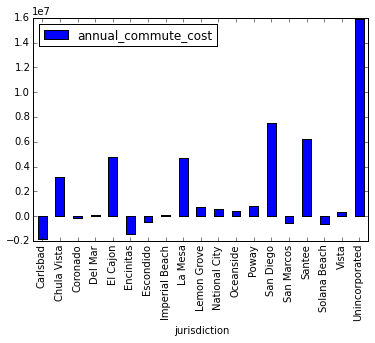

In [16]:
jurisdiction_diff[['jurisdiction','annual_commute_cost']].plot(kind='bar', y='annual_commute_cost', x='jurisdiction')

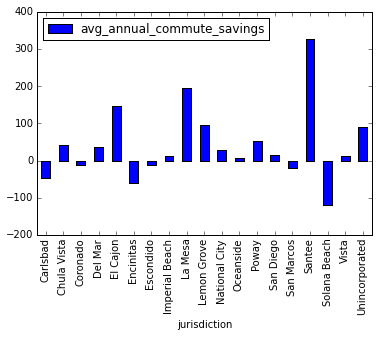

In [17]:
pd.concat([jurisdictions, commuter_savings], axis=1, keys=['jurisdiction','avg_annual_commute_savings']).plot(kind='bar', x='jurisdiction')

In [18]:
base_mode_sum = base_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('super_mode').sum()
alt_mode_sum = alt_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost']].groupby('super_mode').sum()

alt_mode_sum - base_mode_sum

,tour_time,annual_tour_time,annual_commute_cost
super_mode,,,
Bike,-5650.176000,-1198667.805000,-402106.317322
Drive Alone,207691.179111,51319365.883501,27415905.202785
HOV,68227.276043,16111599.756059,6640647.314358
Transit,78022.533388,18110096.773297,6917598.642948
Walk,126.477680,-250328.325489,-213361.677141


In [19]:
base_mode = base_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost','tour_distance']].groupby('super_mode').agg(['count','mean','sum'])
alt_mode = alt_df[['super_mode','tour_time', 'annual_tour_time', 'annual_commute_cost', 'tour_distance']].groupby('super_mode').agg(['count', 'mean','sum'])
base_mode

tour_time                              annual_tour_time  \
                count        mean              sum            count   
super_mode                                                            
Bike            14385   37.856062    544559.458000            14385   
Drive Alone    704642   50.410824  35521584.098408           704642   
HOV            316258   49.039920  15509267.008630           316258   
Transit         36931  111.360357   4112649.328931            36931   
Walk            35650   37.748578   1345736.788285            35650   

                                        annual_commute_cost               \
                     mean           sum               count         mean   
super_mode                                                                 
Bike          8082.532017  1.162672e+08               14385  3490.993241   
Drive Alone  11658.788654  8.215272e+09              704642  6874.263946   
HOV          11187.257663  3.538060e+09              316258  5937.012172   
Transit      24126.439655  8.910135e+08               36931  9440.669019   
Walk          7234.566461  2.579123e+08               35650  2495.986470   

                          tour_distance                              
                      sum         count       mean              sum  
super_mode                                                           
Bike         5.021794e+07         14385   7.571212    108911.891527  
Drive Alone  4.843895e+09        704642  26.310874  18539747.110046  
HOV          1.877628e+09        316258  25.580671   8090091.871794  
Transit      3.486533e+08         36931  17.395971    642450.590613  
Walk         8.898192e+07         35650   1.887429     67286.839703

In [20]:
alt_mode

tour_time                              annual_tour_time  \
                count        mean              sum            count   
super_mode                                                            
Bike            14440   37.320587    538909.282000            14440   
Drive Alone    704297   50.730410  35729275.277519           704297   
HOV            315924   49.307727  15577494.284673           315924   
Transit         37422  111.984177   4190671.862319            37422   
Walk            35766   37.629684   1345863.265965            35766   

                                        annual_commute_cost               \
                     mean           sum               count         mean   
super_mode                                                                 
Bike          7968.736513  1.150686e+08               14440  3449.849824   
Drive Alone  11737.365800  8.266592e+09              704297  6916.557930   
HOV          11250.083355  3.554171e+09              315924  5964.308640   
Transit      24293.828221  9.091236e+08               37422  9501.655341   
Walk          7204.103507  2.576620e+08               35766  2481.925739   

                          tour_distance                              
                      sum         count       mean              sum  
super_mode                                                           
Bike         4.981583e+07         14440   7.464117    107781.856317  
Drive Alone  4.871311e+09        704297  26.155484  18421228.640198  
HOV          1.884268e+09        315924  25.370522   8015156.909991  
Transit      3.555709e+08         37422  17.541501    656438.046014  
Walk         8.876856e+07         35766   1.881484     67293.163593

In [21]:
alt_mode - base_mode

tour_time                          annual_tour_time              \
                count      mean            sum            count        mean   
super_mode                                                                    
Bike               55 -0.535475   -5650.176000               55 -113.795503   
Drive Alone      -345  0.319585  207691.179111             -345   78.577146   
HOV              -334  0.267807   68227.276043             -334   62.825692   
Transit           491  0.623820   78022.533388              491  167.388566   
Walk              116 -0.118894     126.477680              116  -30.462955   

                             annual_commute_cost                              \
                         sum               count       mean              sum   
super_mode                                                                     
Bike         -1198667.805000                  55 -41.143417   -402106.317322   
Drive Alone  51319365.883501                -345  42.293984  27415905.202785   
HOV          16111599.756059                -334  27.296468   6640647.314358   
Transit      18110096.773297                 491  60.986322   6917598.642948   
Walk          -250328.325489                 116 -14.060731   -213361.677141   

            tour_distance                           
                    count      mean            sum  
super_mode                                          
Bike                   55 -0.107095   -1130.035210  
Drive Alone          -345 -0.155391 -118518.469848  
HOV                  -334 -0.210149  -74934.961803  
Transit               491  0.145530   13987.455400  
Walk                  116 -0.005945       6.323889

In [22]:
print 'Total Daily Change in Person Miles Traveled (PMT) on Mandatory Tours: {0:>12,.1f} miles'.format(alt_df.tour_distance.sum() - base_df.tour_distance.sum())

Total Daily Change in Person Miles Traveled (PMT) on Mandatory Tours:   -180,589.7 miles
